In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras import models,layers

In [3]:
(train_img,train_lab),(test_img,test_lab) = mnist.load_data()

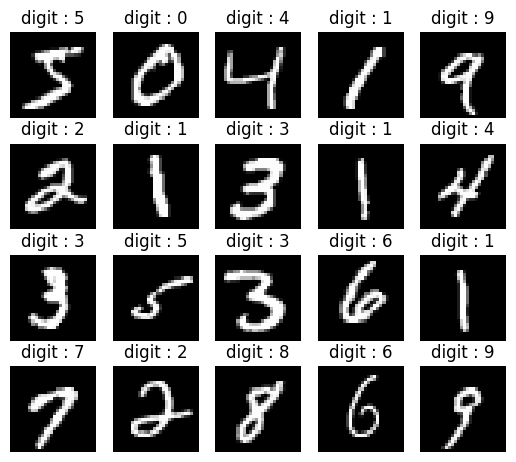

In [4]:
for i in range (20):
  plt.subplot(4,5,i+1)
  plt.imshow(train_img[i],cmap = 'gray')
  plt.title("digit : {}".format(train_lab[i]))
  plt.subplots_adjust(top=1)
  plt.axis('off')

In [5]:
train_img=train_img/255.0
test_img=test_img/225.0

In [6]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(train_img,train_lab,epochs=20,batch_size=500)
test_loss,test_acc=model.evaluate(test_img,test_lab)
print('test accuracy:',test_acc)

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 55s 440ms/step - accuracy: 0.6980 - loss: 1.0655
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 49s 408ms/step - accuracy: 0.9604 - loss: 0.1281
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 84s 423ms/step - accuracy: 0.9761 - loss: 0.0771
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 83s 431ms/step - accuracy: 0.9826 - loss: 0.0567
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 81s 425ms/step - accuracy: 0.9853 - loss: 0.0483
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 49s 409ms/step - accuracy: 0.9880 - loss: 0.0375
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 410ms/step - accuracy: 0.9899 - loss: 0.0341
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 408ms/step - accuracy: 0.9913 - loss: 0.0289
Epoch 9/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 51s 423ms/step - accuracy: 0.9916 - loss: 0.0278
Epoch 10/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 82s 422ms/step - accuracy: 0.9922 - loss: 0.0254
Epoch 11/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 86s 456ms/step - accuracy: 0.9941 - loss: 0.0198
Epoch 12/20
120/120

In [9]:
score = model.evaluate(test_img, test_lab, verbose = 0)

In [10]:
print("test_loss",score[0])
print("test_accuracy",score[1])

test_loss 0.03323090448975563
test_accuracy 0.9922999739646912


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


Text(0.5, 1.0, '0')

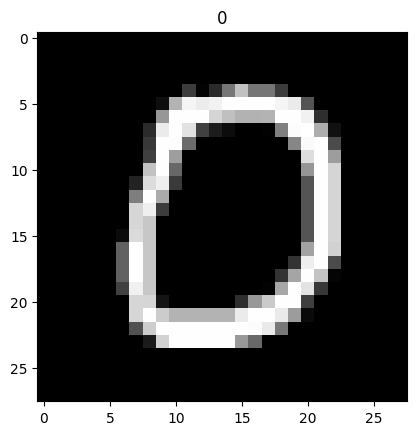

In [11]:
img = test_img[10]
pred = model.predict(img.reshape(1,28,28))
plt.imshow(img,cmap="gray")
plt.title(pred.argmax())